<a href="https://colab.research.google.com/github/arturomf94/estool/blob/master/simple_es_example_pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/arturomf94/estool.git
import os
os.chdir('estool')

Cloning into 'estool'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 334 (delta 17), reused 29 (delta 11), pack-reused 298
Receiving objects: 100% (334/334), 2.71 MiB | 20.37 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 163kB 2.9MB/s 
     |████████████████████████████████| 17.0MB 42.9MB/s 
     |████████████████████████████████| 245kB 43.6MB/s 
     |████████████████████████████████| 16.1MB 32.8MB/s 
     |████████████████████████████████| 450kB 44.3MB/s 
     |████████████████████████████████| 44.9MB 73.5MB/s 
  Created wheel for gym: filename=gym-0.9.4-cp36-none-any.whl size=215484 sha256=9fef56f63939fbce471f2d3613645c9209029a3c594e06e45f88e6012ad25b84
  Stored in directory: /root/.cache/pip/wheels/2f/ae/a0/126678adc5f1f8905309a4712ea29537999787f610edbcb0a4
  Created wheel for pybullet: filename=pybullet-1.6.3-cp36-cp36m-linux_x86_64.whl size=26923801 sha256=e309bf4e9d5f982ddc3cf5ff8969cabb2560abc9f8aae6bad0b704a41b15f627
  Stored in directory: /root/.cache/pip/wheels/58/78/7f/fb2809c07e1da5117eaff2ada2f093faa882ff4393d2e7bab6
Successfully built gym pybullet
ERROR: tensorflow 1.14.0 has requirement numpy<2.0,>=1.14.5, but you'll have numpy 1.13.3 which is inc

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cma
from es import SimpleGA, CMAES, PEPG, OpenES, PSO, modified_PSO, PSO_CMA_ES

In [0]:
# from https://github.com/CMA-ES/pycma/blob/master/cma/fitness_functions.py
def rastrigin(x):
  """Rastrigin test objective function, shifted by 10. units away from origin"""
  x = np.copy(x)
  x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

fit_func = rastrigin



In [0]:
NPARAMS = 100        # make this a 100-dimensinal problem.
NPOPULATION = 101    # use population size of 101.
MAX_ITERATION = 4000 # run each solver for 5000 generations.

In [0]:
# defines a function to use solver to solve fit_func
def test_solver(solver):
  history = []
  for j in range(MAX_ITERATION):
    solutions = solver.ask()
    fitness_list = np.zeros(solver.popsize)
    for i in range(solver.popsize):
      fitness_list[i] = fit_func(solutions[i])
    solver.tell(fitness_list)
    result = solver.result() # first element is the best solution, second element is the best fitness
    history.append(result[1])
    if (j+1) % 100 == 0:
      print("fitness at iteration", (j+1), result[1])
  print("local optimum discovered by solver:\n", result[0])
  print("fitness score at this local optimum:", result[1])
  return history

In [7]:
x = np.zeros(NPARAMS) # 100-dimensional problem
print("This is F(0):")
print(rastrigin(x))

This is F(0):
-10000.0


In [8]:
x = np.ones(NPARAMS)*10. # 100-dimensional problem
print(rastrigin(x))
print("global optimum point:\n", x)

-0.0
global optimum point:
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [0]:
# defines genetic algorithm solver
ga = SimpleGA(NPARAMS,                # number of model parameters
               sigma_init=0.5,        # initial standard deviation
               popsize=NPOPULATION,   # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.00,     # weight decay coefficient
              )

In [10]:
ga_history = test_solver(ga)

fitness at iteration 100 -1229.2121300831222
fitness at iteration 200 -1080.8508164217474
fitness at iteration 300 -1077.2673192374366
fitness at iteration 400 -1002.2823792533158
fitness at iteration 500 -988.2327412554105
fitness at iteration 600 -978.324764204276
fitness at iteration 700 -946.8083712756297
fitness at iteration 800 -885.8245405063919
fitness at iteration 900 -801.4191906048881
fitness at iteration 1000 -798.3943908695335
fitness at iteration 1100 -728.8537425206559
fitness at iteration 1200 -669.8025548035223
fitness at iteration 1300 -656.8484045893648
fitness at iteration 1400 -595.1364794613589
fitness at iteration 1500 -557.0172173275554
fitness at iteration 1600 -502.82284477743417
fitness at iteration 1700 -413.3453482570741
fitness at iteration 1800 -413.3453482570741
fitness at iteration 1900 -363.03165306507015
fitness at iteration 2000 -349.6946554362587
fitness at iteration 2100 -319.1565037251469
fitness at iteration 2200 -300.18921507006587
fitness at it

In [11]:
# defines CMA-ES algorithm solver
cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 0.5
          )


(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=488013, Tue Sep 24 16:26:39 2019)


In [12]:
cma_history = test_solver(cmaes)

fitness at iteration 100 -1070.5761603168091
fitness at iteration 200 -810.9676849434829
fitness at iteration 300 -91.80739623558895
fitness at iteration 400 -44.79691123509974
fitness at iteration 500 -44.77316960150176
fitness at iteration 600 -44.77315254601888
fitness at iteration 700 -44.77315253139102
fitness at iteration 800 -44.773152531379196
fitness at iteration 900 -44.773152531379196
fitness at iteration 1000 -44.773152531379196
fitness at iteration 1100 -44.773152531379196
fitness at iteration 1200 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.76e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1248)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.68e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1252)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.63e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1253)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 1300 -44.773152531379196
fitness at iteration 1400 -44.773152531379196
fitness at iteration 1500 -44.773152531379196
fitness at iteration 1600 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=2.23e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1624)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.86e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1667)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.83e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1668)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 1700 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.33e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1702)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.32e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1703)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.44e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1719)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 1800 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.71e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1810)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.83e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1814)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.74e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1866)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 1900 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.51e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1902)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.46e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1904)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.44e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1905)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2000 -44.773152531379196
fitness at iteration 2100 -44.773152531379196
fitness at iteration 2200 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.25e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2275)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.24e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2276)
  ')')


fitness at iteration 2300 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.39e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2327)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.40e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2330)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.31e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2338)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2400 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.31e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2417)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.28e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2419)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.25e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2420)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2500 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.09e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2504)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.14e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2518)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.12e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2519)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2600 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=9.60e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2601)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=9.38e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2603)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=9.29e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2604)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2700 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=9.55e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2702)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=9.98e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2704)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.03e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2706)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2800 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=1.04e-09).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2811)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=9.69e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2824)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=9.68e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2827)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 2900 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=7.27e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2902)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=7.45e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2904)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=7.47e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2905)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3000 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=9.65e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3001)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=9.68e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3002)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=9.75e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3003)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3100 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.99e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3101)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.77e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3105)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.60e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3107)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3200 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=5.70e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3201)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=5.67e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3202)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=5.52e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3203)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3300 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.89e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3301)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.66e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3302)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.58e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3303)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3400 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=4.63e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3401)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=4.71e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3402)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=4.68e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3403)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3500 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=5.05e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3501)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=5.01e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3502)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=5.01e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3503)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3600 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.84e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3602)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.86e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3603)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=7.01e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3604)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3700 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=5.19e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3701)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=5.14e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3702)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=5.14e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3703)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3800 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.45e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3801)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.41e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3803)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.55e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3805)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 3900 -44.773152531379196


/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.74e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3905)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.83e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3908)
  ')')
/usr/local/lib/python3.6/dist-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=44.773153, sigma=6.01e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3919)
  ')')
/usr/local/lib/python3.6/dis

fitness at iteration 4000 -44.773152531379196
local optimum discovered by solver:
 [10.99495863  9.00504136 10.          9.00504136 10.          9.00504136
  9.00504136 10.99495863 10.99495864 10.99495864 10.          9.00504136
 10.99495864 11.98991223 10.         10.00000001 10.99495864 10.99495865
 10.          9.99999999 10.         10.00000001 10.99495863 10.
 10.         10.         10.00000001 10.00000001  9.00504136  9.00504136
 10.99495863  9.00504136  9.99999999 10.99495864 10.99495865  9.00504136
 10.99495864 10.00000001  9.99999999 10.00000001 10.         10.00000001
  9.00504137  9.00504136  9.99999999 10.         10.00000001 10.
  9.00504136 10.99495864  9.99999999 10.00000001 10.00000001 10.99495864
 10.99495864  9.99999999 10.          9.99999999 10.          9.99999999
 10.00000001  9.99999999  9.99999999 10.99495863 10.00000001 10.99495864
 10.         10.         10.00000001 10.         10.99495862 10.00000002
 10.         10.99495864 10.         10.          9.00504

In [0]:
# defines PEPG (NES) solver
pepg = PEPG(NPARAMS,                         # number of model parameters
            sigma_init=0.5,                  # initial standard deviation
            learning_rate=0.1,               # learning rate for standard deviation
            learning_rate_decay=1.0,       # don't anneal the learning rate
            popsize=NPOPULATION,             # population size
            average_baseline=False,          # set baseline to average of batch
            weight_decay=0.00,            # weight decay coefficient
            rank_fitness=False,           # use rank rather than fitness numbers
            forget_best=False)            # don't keep the historical best solution)

In [14]:
pepg_history = test_solver(pepg)

fitness at iteration 100 -3476.1649022964234
fitness at iteration 200 -1231.3996634825758
fitness at iteration 300 -973.3224843928406
fitness at iteration 400 -844.0062379814897
fitness at iteration 500 -612.7492688603963
fitness at iteration 600 -508.3174708949498
fitness at iteration 700 -385.2210141581787
fitness at iteration 800 -307.4057753949688
fitness at iteration 900 -295.56725329166613
fitness at iteration 1000 -222.99941049584936
fitness at iteration 1100 -201.54002887711715
fitness at iteration 1200 -168.38057995488373
fitness at iteration 1300 -154.5145208961585
fitness at iteration 1400 -152.96426506310604
fitness at iteration 1500 -150.48896417674678
fitness at iteration 1600 -146.78471221199356
fitness at iteration 1700 -143.83991948431094
fitness at iteration 1800 -141.4123668339098
fitness at iteration 1900 -139.91381305281107
fitness at iteration 2000 -138.6074473524426
fitness at iteration 2100 -137.543640286269
fitness at iteration 2200 -137.08981717366942
fitness 

In [0]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
oes = OpenES(NPARAMS,                  # number of model parameters
            sigma_init=0.5,            # initial standard deviation
            sigma_decay=0.999,         # don't anneal standard deviation
            learning_rate=0.1,         # learning rate for standard deviation
            learning_rate_decay = 1.0, # annealing the learning rate
            popsize=NPOPULATION,       # population size
            antithetic=False,          # whether to use antithetic sampling
            weight_decay=0.00,         # weight decay coefficient
            rank_fitness=False,        # use rank rather than fitness numbers
            forget_best=False)

In [16]:
oes_history = test_solver(oes)

fitness at iteration 100 -2537.0459913066543
fitness at iteration 200 -835.0341070528298
fitness at iteration 300 -821.3024850734962
fitness at iteration 400 -821.3024850734962
fitness at iteration 500 -820.2600601157526
fitness at iteration 600 -800.425634842835
fitness at iteration 700 -674.3568124450173
fitness at iteration 800 -636.5192356823711
fitness at iteration 900 -600.9088640309797
fitness at iteration 1000 -566.1145622142817
fitness at iteration 1100 -496.93879141735965
fitness at iteration 1200 -430.9564652744864
fitness at iteration 1300 -377.78123552127056
fitness at iteration 1400 -347.5098367445213
fitness at iteration 1500 -334.8067250814495
fitness at iteration 1600 -286.29827236505935
fitness at iteration 1700 -281.57774531000973
fitness at iteration 1800 -259.24739133616083
fitness at iteration 1900 -225.58790649254536
fitness at iteration 2000 -225.58790649254536
fitness at iteration 2100 -221.77719602248214
fitness at iteration 2200 -219.3661435414307
fitness at 

In [0]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
# this version turns on antithetic sampling. It doesn't really help, and sometimes hurts performance.
oes_antithetic = OpenES(NPARAMS,            # number of model parameters
                 sigma_init=0.5,            # initial standard deviation
                 sigma_decay=0.999,         # don't anneal standard deviation
                 learning_rate=0.1,         # learning rate for standard deviation
                 learning_rate_decay=1.0,   # annealing the learning rate
                 popsize=NPOPULATION+1,     # population size
                 antithetic=True,           # whether to use antithetic sampling
                 weight_decay=0.00,         # weight decay coefficient
                 rank_fitness=False,        # use rank rather than fitness numbers
                 forget_best=False)


In [18]:
oes_antithetic_history = test_solver(oes_antithetic)

fitness at iteration 100 -3106.1114259267533
fitness at iteration 200 -934.1516143735729
fitness at iteration 300 -813.9637304214978
fitness at iteration 400 -813.9637304214978
fitness at iteration 500 -797.7708209991139
fitness at iteration 600 -756.4656159481083
fitness at iteration 700 -661.6441936425415
fitness at iteration 800 -585.0986752206006
fitness at iteration 900 -498.45717128749686
fitness at iteration 1000 -465.43533774130356
fitness at iteration 1100 -429.91101966133897
fitness at iteration 1200 -391.36733591925633
fitness at iteration 1300 -370.3376806372504
fitness at iteration 1400 -343.70743745601476
fitness at iteration 1500 -313.417270675885
fitness at iteration 1600 -305.07769754442415
fitness at iteration 1700 -258.5345240124009
fitness at iteration 1800 -246.33052862643706
fitness at iteration 1900 -236.5736261019331
fitness at iteration 2000 -234.0684738632657
fitness at iteration 2100 -227.46077731204082
fitness at iteration 2200 -212.05001533720497
fitness at

In [0]:
pso = PSO(NPARAMS,
         c1 = 0,
         c2 = 0.9,
         w = 0.9,
         popsize = NPOPULATION,
         sigma_init = 0.5,
         weight_decay = 0.00)

In [20]:
pso_history = test_solver(pso)

fitness at iteration 100 -3918.800506182822
fitness at iteration 200 -2930.002149804044
fitness at iteration 300 -2260.459523171847
fitness at iteration 400 -1995.155804267717
fitness at iteration 500 -1839.9865340446006
fitness at iteration 600 -1699.8864135704566
fitness at iteration 700 -1588.9351758975326
fitness at iteration 800 -1514.995339695588
fitness at iteration 900 -1460.3680357472622
fitness at iteration 1000 -1417.506981392522
fitness at iteration 1100 -1367.7471212024218
fitness at iteration 1200 -1310.5388730703128
fitness at iteration 1300 -1276.1367932927642
fitness at iteration 1400 -1257.4697799882726
fitness at iteration 1500 -1242.289291575927
fitness at iteration 1600 -1232.9424641481564
fitness at iteration 1700 -1226.1165814476985
fitness at iteration 1800 -1211.4842435918745
fitness at iteration 1900 -1175.8844026636225
fitness at iteration 2000 -1161.6222278680489
fitness at iteration 2100 -1155.6926836448702
fitness at iteration 2200 -1147.7713033810335
fitn

In [0]:
modified_pso = modified_PSO(NPARAMS,
                c1 = 0,
                c2 = 0.9,
                w = 0.9,
                popsize = NPOPULATION,
                sigma_init = 0.5,
                weight_decay = 0.00)

In [42]:
m_pso_history = test_solver(modified_pso)

fitness at iteration 100 -5029.546037767885
fitness at iteration 200 -3595.6491334671286
fitness at iteration 300 -2744.8941094124993
fitness at iteration 400 -2215.863344814866
fitness at iteration 500 -1875.2048830702734
fitness at iteration 600 -1693.2218832537212
fitness at iteration 700 -1471.6346279531333
fitness at iteration 800 -1323.6435369939384
fitness at iteration 900 -1218.4293874518673
fitness at iteration 1000 -1132.2601659489935
fitness at iteration 1100 -1073.6435832182685
fitness at iteration 1200 -1021.0159559484016
fitness at iteration 1300 -996.1517458173316
fitness at iteration 1400 -967.724104784684
fitness at iteration 1500 -951.8132636539902
fitness at iteration 1600 -942.1664779223388
fitness at iteration 1700 -922.5344622047876
fitness at iteration 1800 -901.2493397928176
fitness at iteration 1900 -892.9616437236984
fitness at iteration 2000 -884.4182321915007
fitness at iteration 2100 -865.9645779968198
fitness at iteration 2200 -849.1418042227293
fitness at

In [45]:
pso_cma_es = PSO_CMA_ES(NPARAMS,
                c1 = 0,
                c2 = 0.9,
                w = 0.9,
                popsize = NPOPULATION,
                sigma_init = 0.5,
                weight_decay = 0.00,
                min_pop_std = 0.70)

ES!
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=399115, Tue Sep 24 16:40:59 2019)


In [46]:
pso_cma_es_history = test_solver(pso_cma_es)

fitness at iteration 100 -1018.2914385697856
fitness at iteration 200 -819.2694166242749
fitness at iteration 300 -773.1330706673117
fitness at iteration 400 -773.1330706673117
PSO!
fitness at iteration 500 -401.1757998688347
fitness at iteration 600 -337.5167935370456
fitness at iteration 700 -248.77949108553275
fitness at iteration 800 -181.5071274657322
fitness at iteration 900 -150.09131249965287
fitness at iteration 1000 -125.8513228743169
fitness at iteration 1100 -105.62749000923702
fitness at iteration 1200 -95.47945447136067
fitness at iteration 1300 -86.71453134335275
fitness at iteration 1400 -80.919213418087
fitness at iteration 1500 -77.08705070779399
fitness at iteration 1600 -70.97141118558
fitness at iteration 1700 -67.8736034337295
fitness at iteration 1800 -64.72732943137134
fitness at iteration 1900 -63.07848169370823
fitness at iteration 2000 -61.42737709372352
fitness at iteration 2100 -59.94214979652395
fitness at iteration 2200 -59.23089742327204
fitness at itera

AttributeError: ignored

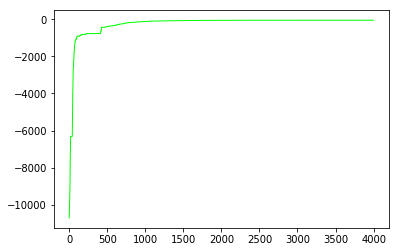

In [51]:
pso_cma_es_line = plt.plot(pso_cma_es_history, color="lime", linewidth=1.0, linestyle="-", label='PSO-CMA-ES')
pso_cma_es_line.get_label()

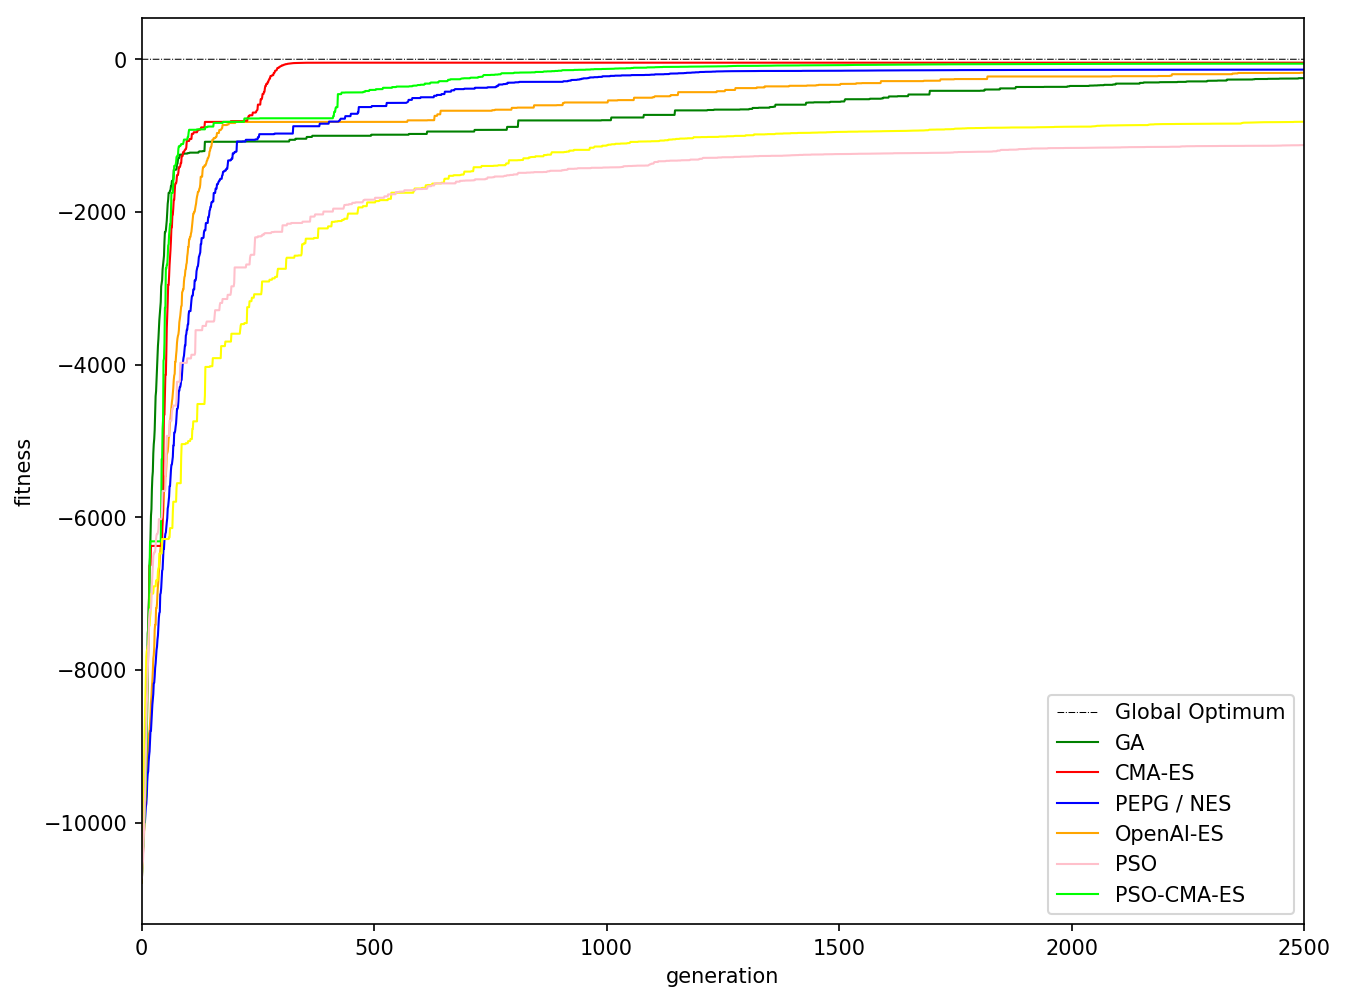

In [55]:
# Create a new figure of size 8x6 points, using 100 dots per inch
best_history = [0] * MAX_ITERATION
plt.figure(figsize=(10,8), dpi=150)

optimum_line, = plt.plot(best_history, color="black", linewidth=0.5, linestyle="-.", label='Global Optimum')
ga_line, = plt.plot(ga_history, color="green", linewidth=1.0, linestyle="-", label='GA')
oes_line, = plt.plot(oes_history, color="orange", linewidth=1.0, linestyle="-", label='OpenAI-ES')
pepg_line, = plt.plot(pepg_history, color="blue", linewidth=1.0, linestyle="-", label='PEPG / NES')
cma_line, = plt.plot(cma_history, color="red", linewidth=1.0, linestyle="-", label='CMA-ES')
pso_cma_es_line, = plt.plot(pso_cma_es_history, color="lime", linewidth=1.0, linestyle="-", label='PSO-CMA-ES')
m_pso_line, = plt.plot(m_pso_history, color="yellow", linewidth=1.0, linestyle="-", label='Modified PSO')
pso_line, = plt.plot(pso_history, color="pink", linewidth=1.0, linestyle="-", label='PSO')




plt.legend(handles=[optimum_line, ga_line, cma_line, pepg_line, oes_line, pso_line, pso_cma_es_line], loc=4)

# Set x limits
plt.xlim(0,2500)

plt.xlabel('generation')
plt.ylabel('fitness')

# plt.savefig("./rastrigin_10d.svg")

plt.show()

pso_line, = plt.plot(pso_history, color="pink", linewidth=1.0, linestyle="-", label='PSO')
m_pso_line = plt.plot(m_pso_history, color="yellow", linewidth=1.0, linestyle="-", label='Modified PSO')
pso_cma_es_line = plt.plot(pso_cma_es_history, color="lime", linewidth=1.0, linestyle="-", label='PSO-CMA-ES')